In [80]:
import numpy as np
from matplotlib import pyplot as plt
import math

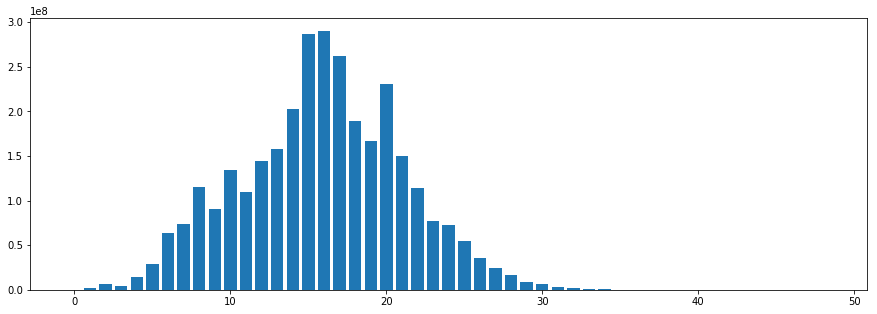

In [81]:
data = np.load('/global/cscratch1/sd/yuanlai/gf_test/byte_by_app_src-2017.npy', encoding='bytes')[()]
data = data['globusonline-fxp'][:49]
data  = list(data)
x = [i for i in range(0, 49)]
plt.close()
plt.figure(figsize=(15, 5))
plt.bar(x, data)
plt.show()
data_sum = sum(data)
data_accu = [0] * 49
data_accu[0] = data[0]
for i in range(1, len(data)):
    data_accu[i] = data_accu[i-1] + data[i]
data_accu = [i * 100 / data_sum for i in data_accu]

In [82]:
len(data)

49

In [83]:
file = "/global/cscratch1/sd/yuanlai/gf_test/new_test_files_limit_ost/file_size"

In [84]:
bin_size = [0] * 49
with open(file, "r") as f:
    for line in f:
        lineSplit = line.split()
        size = int(lineSplit[4])
        if size == 0:
            break
        bin_size[int(math.log(size, 2))] += 1
bin_size_sum = sum(bin_size)
bin_size_accu = [0] * 49
bin_size_accu[0] = bin_size[0]
for i in range(1, len(bin_size)):
    bin_size_accu[i] = bin_size_accu[i-1] + bin_size[i]
bin_size_accu = [i * 100 / bin_size_sum for i in bin_size_accu]

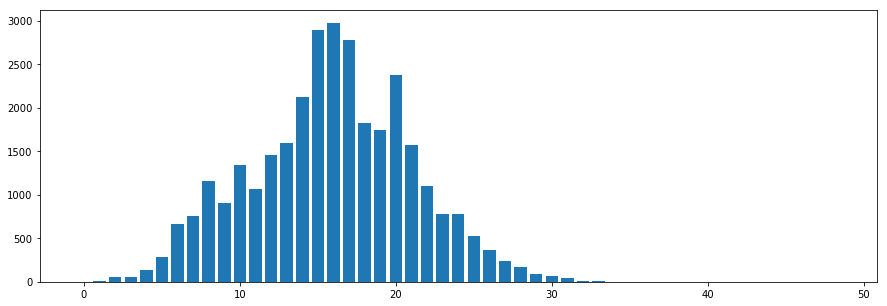

In [85]:
plt.close()
plt.figure(figsize=(15, 5))
plt.bar(x, bin_size)
plt.show()

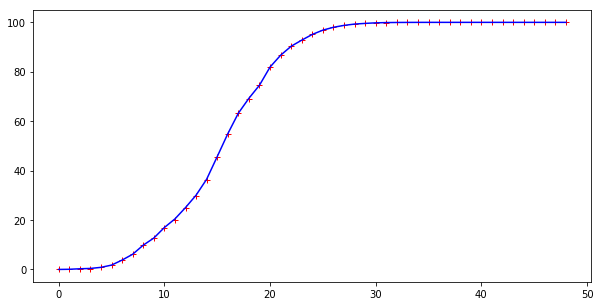

In [86]:
plt.close()
plt.figure(figsize=(10, 5))
plt.plot(x, bin_size_accu, 'r+')
plt.plot(x, data_accu, 'b-')
plt.show()

In [87]:
file = "/global/cscratch1/sd/yuanlai/gf_test/new_test_files_limit_ost/file_stripe"

In [88]:
bin_ost = [0] * 248
i = 0
with open(file, "r") as f:
    for line in f:
        if (i + 2) % 9 == 0:
            ost = int(line.split()[0])
            bin_ost[ost] += 1
            #print(line.split())
        i += 1
        #lineSplit = line.split()
#         size = int(lineSplit[4])
#         if size == 0:
#             break
#         bin_size[int(math.log(size, 2))] += 1

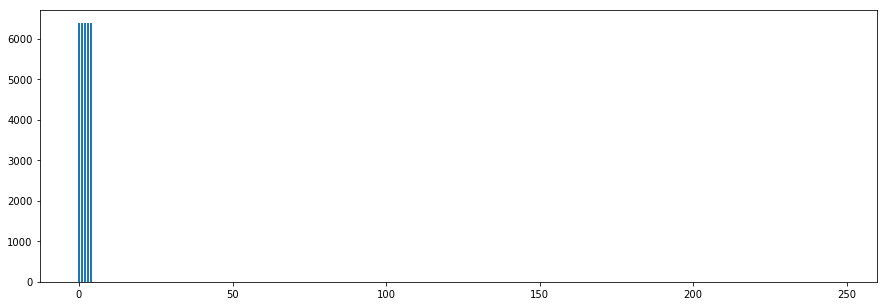

In [90]:
x1 = [i for i in range(248)]
plt.close()
plt.figure(figsize=(15, 5))
plt.bar(x1, bin_ost)

plt.show()